# UV plane of interferometry

The UV plane is a convolution of the aperature of the interferometer. The aperature plane is physically the dishes, and their combination.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = (4, 3)

## Aperature of an array with redundant baselines

Imagine an array with 12 elements where 3 elements are redundant in groups of 4.

(-1, 4)

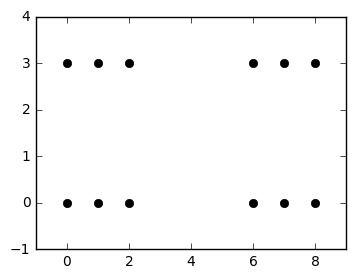

In [2]:
x,y = np.linspace(0,8,num=9,dtype=int),np.linspace(0,3,num=4,dtype=int)
ants = np.array([[1,1,1,0,0,0,1,1,1],list(np.zeros(9,dtype=int)),list(np.zeros(9,dtype=int)),[1,1,1,0,0,0,1,1,1]])
ants = np.hstack((ants,np.zeros_like(ants)))
ants = np.hstack((ants,np.zeros_like(ants)))
ants = np.vstack((ants,np.zeros_like(ants)))
ants = np.vstack((ants,np.zeros_like(ants)))

fig,ax = plt.subplots(1,1)
for l in x:
    for m in y:
        if ants[m][l]:
            ax.plot(l,m,'k',marker='o')
ax.set_xlim([-1,9])
ax.set_ylim([-1,4])

(-5, 5)

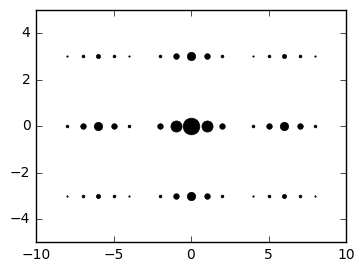

In [13]:
# uv_plane = signal.convolve2d(ants,ants)
uv_plane = np.fft.fftshift(np.fft.ifft2(np.abs(np.fft.fft2(ants))**2))
u,v = np.shape(uv_plane)

fig,ax = plt.subplots(1,1)
for x in range(v):
    for y in range(u):
        if uv_plane[y][x]:
            ax.plot(x-18,y-8,'k',marker='o',markersize=np.abs(uv_plane[y][x]))
ax.set_xlim([-10,10])
ax.set_ylim([-5,5])

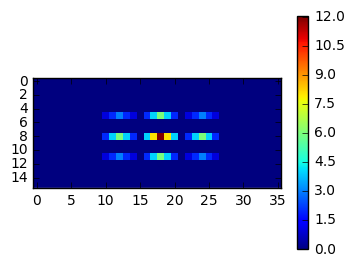

In [15]:
plt.imshow(np.abs(uv_plane),interpolation='none')
plt.colorbar()

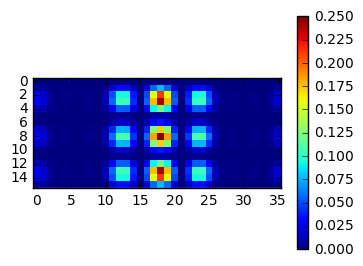

In [16]:
beams = np.fft.ifft2(uv_plane)

plt.imshow(np.abs(np.fft.fftshift(beams)),interpolation='none')#,norm=LogNorm(vmin=beams.min(), vmax=beams.max()))
plt.colorbar()